<a href="https://colab.research.google.com/github/jcmachicao/uc_curso_modelamientopredictivo/blob/master/modpred__02B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Cuaderno 02B
# **Curso Modelamiento Predictivo**
---
* **Ampliación de Arbol de Decisiones y Cross Validation**
* Autor: José Carlos Machicao
* Licencia: [GestioDinámica](http://www.gestiodinamica.com) 2020

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
ruta = 'drive/My Drive/2020 Cursos/2020 Modelamiento Predictivo/uc_modpred_materiales/'

In [64]:
data = pd.read_csv(ruta + 'modpred_foldercompartido/clientes_tienda.csv')

In [65]:
data.columns = ['id', 'genero', 'edad', 'ingreso', 'gasto']
data.head()

,id,genero,edad,ingreso,gasto
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [66]:
data['gen_num'] = pd.factorize(data.genero)[0]

In [67]:
X = data.drop(['genero', 'gen_num'], axis=1)
y = data['gen_num']

In [68]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [69]:
model = DecisionTreeClassifier(max_depth=2)

In [70]:
model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [71]:
data['predic'] = model.predict(X)

In [72]:
data.head()

,id,genero,edad,ingreso,gasto,gen_num,predic
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,0,1
2,3,Female,20,16,6,1,1
3,4,Female,23,16,77,1,1
4,5,Female,31,17,40,1,1


### Tipos de cálculo de las ramas en un árbol (2 principales)
Gini Index
* Calculado restando la suma del cuadrado de las probabilidades de la primera clase considerada en las variables de entrada. Favorece las particiones grandes. La intuición es que mide qué tan lejos está una categoría de una distribución perfecta.

Information Gain
* Multiplica la probabilidad de la clase por el logaritmo (base 2) de la probabilidad de la clase, favoreciendo las partes más pequeñas con valores distintos.

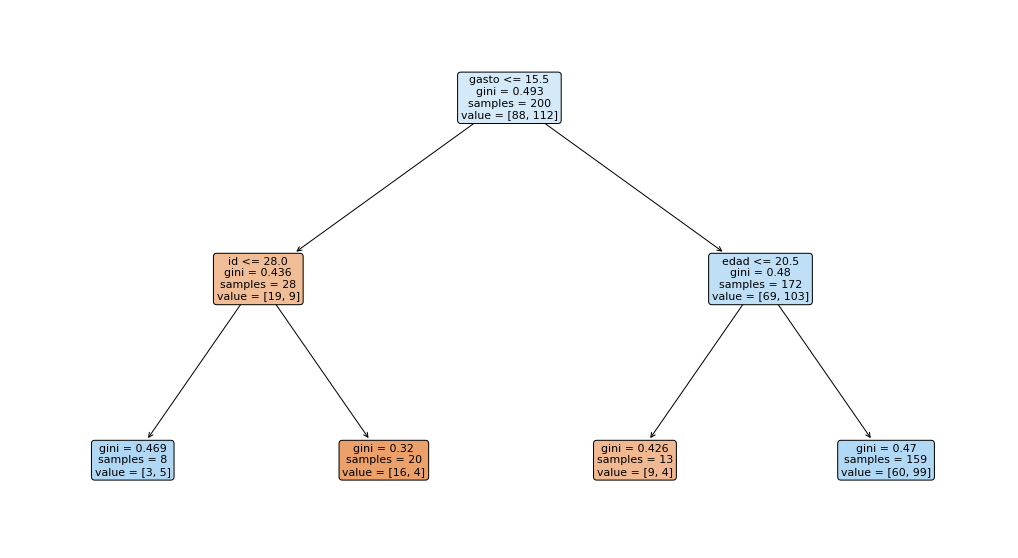

In [73]:
plt.figure(figsize=(18,10))
plot_tree(model, max_depth=2, rounded=True, fontsize=11, label='all', filled=True, feature_names=X.columns)
plt.show()
# lo más importante cuando se interpreta un árbol de decisión es la estrutura

In [74]:
from sklearn.model_selection import cross_val_score

In [77]:
scores = cross_val_score(model, X, y, cv=10)
scores

array([0.4 , 0.5 , 0.55, 0.55, 0.5 , 0.5 , 0.5 , 0.6 , 0.6 , 0.6 ])

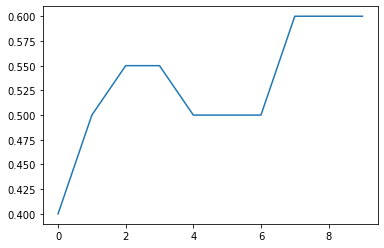

In [78]:
plt.plot(scores)